
 Number of unique words: 965

 Number of selected words (cutoff 1.2 tf-idf): 804


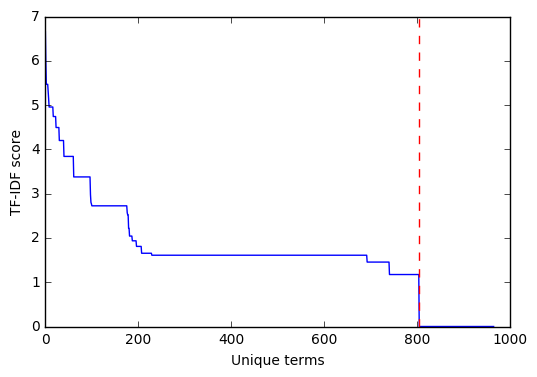

In [1]:
# CREATE DICTIONARIES FOR SDGs GOALS 4, 5, 9 14 and 17

import numpy as np

file = open('goal4.txt')
goal4 = file.read()

file = open('goal5.txt')
goal5 = file.read()

file = open('goal9.txt')
goal9 = file.read()

file = open('goal14.txt')
goal14 = file.read()

file = open('goal17.txt')
goal17 = file.read()

# COMBINE INTO ONE
goals = np.empty(5,dtype=str)
goals=[goal4,goal5,goal9,goal14,goal17]

# BUILD THE DOCUMENT-TERM MATRIX BASED ON A CUTTOFF TF-IDF
#import packages
import matplotlib.pyplot as plt
import nltk as nl
from nltk.tokenize import word_tokenize
import pandas as pd
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
import operator
# Download corpora if necessary: nl.download()

#Processing of the data
stop_words = get_stop_words('en')
st = PorterStemmer()
docs = pd.Series(np.zeros(5))
tokens = [] #List of all words.

for i, line in enumerate(goals):
    #Tokenize the data:
    doc_i = word_tokenize(line.lower())
    #Remove non-alphabetic characters:
    doc_i = [tok for tok in doc_i if tok.isalpha()]
    #Remove stopwords using a list of your choice:
    doc_i = [tok for tok in doc_i if tok not in stop_words]
    #Stem the data using the Porter stemmer:
    doc_i = [st.stem(tok) for tok in doc_i]
    #Ignore single characters (interpretation is difficult)
    doc_i = [tok for tok in doc_i if len(tok)>1]
    
    tokens.extend(doc_i)
    docs.ix[i] = doc_i

# Corpus-level tf-idf score for every term, and choose a cutoff below which to remove words.
unique_words = np.unique(tokens)
lw = len(unique_words) # Number of words
ld = len(docs) # Number of documents

word_count = nl.FreqDist(tokens)
tf = {k: 1+np.log(v) for k, v in word_count.items()}
df = {k: np.sum(list(map(lambda x: k in x, docs))) for k in word_count.keys()}
idf = {k: np.log(ld/v) for k, v in df.items()}
tfidf = {k : v * tf[k] for k, v in idf.items() if k in tf}

# Based on the ranking we select the with highest tf-idf
# 1st we get the rank
rank = sorted(tfidf.items(), key=operator.itemgetter(1), reverse=True)
cutoff = rank[800][1]
# 2nd apply the cut-off
selected_words = {k: v for k, v in tfidf.items() if v>=cutoff}
ls = len(selected_words) # number of selected words

%matplotlib inline
plt.plot([x[1] for x in rank])
plt.axvline(ls, color='red',linestyle='dashed')
plt.xlabel("Unique terms")
plt.ylabel("TF-IDF score")

print("\n Number of unique words: %d" %lw)

print("\n Number of selected words (cutoff %3.1f tf-idf): %d" %(cutoff,ls))

#Document-term matrix using words selected using the tf-idf score.
X = pd.DataFrame(np.zeros(shape = (ld, ls)), columns = selected_words.keys())

for w in selected_words.keys():
    X[w] = list(map(lambda x: x.count(w), docs))

In [2]:
# FIT LDA MODEL ON THE DOCUMENTS

import lda

model = lda.LDA(n_topics=20, n_iter=1500, random_state=1)

model.fit(np.array(X,dtype=np.int32))

INFO:lda:n_documents: 5
INFO:lda:vocab_size: 804
INFO:lda:n_words: 1754
INFO:lda:n_topics: 20
INFO:lda:n_iter: 1500
INFO:lda:<0> log likelihood: -20043
INFO:lda:<10> log likelihood: -13739
INFO:lda:<20> log likelihood: -13384
INFO:lda:<30> log likelihood: -13273
INFO:lda:<40> log likelihood: -13233
INFO:lda:<50> log likelihood: -13221
INFO:lda:<60> log likelihood: -13186
INFO:lda:<70> log likelihood: -13136
INFO:lda:<80> log likelihood: -13202
INFO:lda:<90> log likelihood: -13162
INFO:lda:<100> log likelihood: -13144
INFO:lda:<110> log likelihood: -13090
INFO:lda:<120> log likelihood: -13169
INFO:lda:<130> log likelihood: -13152
INFO:lda:<140> log likelihood: -13150
INFO:lda:<150> log likelihood: -13163
INFO:lda:<160> log likelihood: -13178
INFO:lda:<170> log likelihood: -13187
INFO:lda:<180> log likelihood: -13164
INFO:lda:<190> log likelihood: -13162
INFO:lda:<200> log likelihood: -13171
INFO:lda:<210> log likelihood: -13185
INFO:lda:<220> log likelihood: -13136
INFO:lda:<230> log li

<lda.lda.LDA instance at 0xb4f7198c>

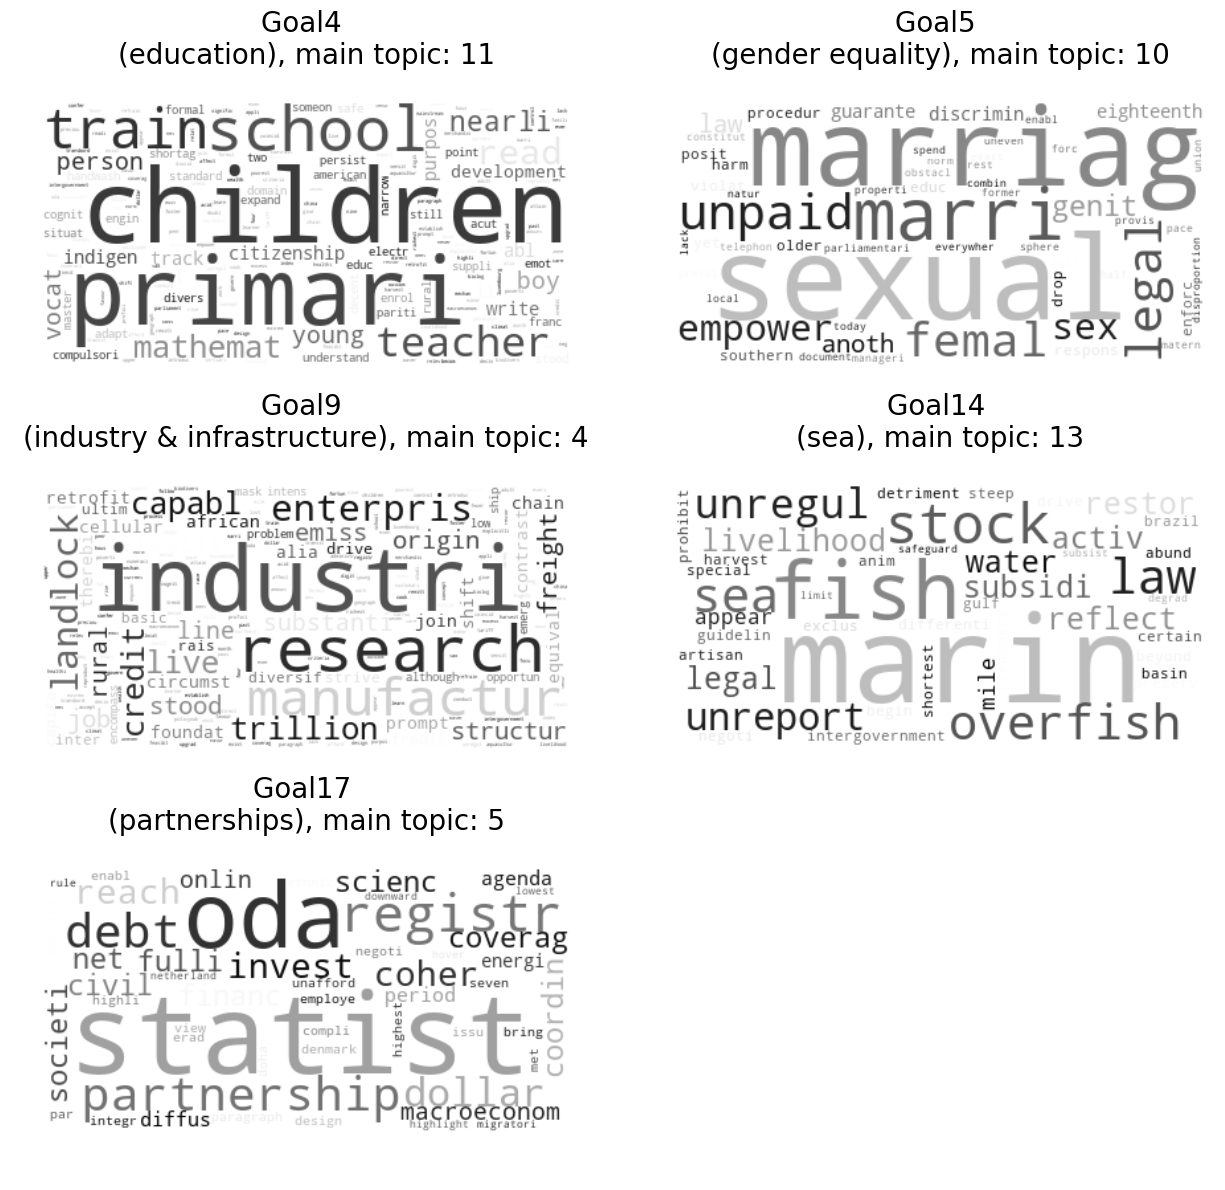

In [3]:
# SHOW MAIN TOPIC PER DOCUMENT WITH WORDCLOUD
titles = ['Goal4 \n(education)','Goal5 \n(gender equality)','Goal9 \n(industry & infrastructure)','Goal14 \n(sea)','Goal17 \n(partnerships)']
doc_topic = model.doc_topic_
topic_word = model.topic_word_

top_topic = np.zeros(5,dtype=np.int) 
for i in range(5):
     top_topic[i] = doc_topic[i].argmax()

from wordcloud import WordCloud

# load word frequencies for each top_topic
topic1 = {}
for i,term in enumerate(X.columns):
    topic1[term] = topic_word[top_topic[0],i]

topic2 = {}
for i,term in enumerate(X.columns):
    topic2[term] = topic_word[top_topic[1],i]

topic3 = {}
for i,term in enumerate(X.columns):
    topic3[term] = topic_word[top_topic[2],i]

topic4 = {}
for i,term in enumerate(X.columns):
    topic4[term] = topic_word[top_topic[3],i]

topic5 = {}
for i,term in enumerate(X.columns):
    topic5[term] = topic_word[top_topic[4],i]

# calculate wordclouds
wordcloud1 = WordCloud(relative_scaling=0.6,background_color='white', colormap="binary", random_state=6).generate_from_frequencies(topic1)
wordcloud2 = WordCloud(relative_scaling=0.6,background_color='white', colormap="binary", random_state=3).generate_from_frequencies(topic2)
wordcloud3 = WordCloud(relative_scaling=0.6,background_color='white', colormap="binary", random_state=50).generate_from_frequencies(topic3)
wordcloud4 = WordCloud(relative_scaling=0.6,background_color='white', colormap="binary", random_state=3).generate_from_frequencies(topic4)
wordcloud5 = WordCloud(relative_scaling=0.6,background_color='white', colormap="binary", random_state=6).generate_from_frequencies(topic5)

#plot them
fig, ax = plt.subplots(3,2, figsize=(15,14))
ax[0,0].axis("off")
ax[0,0].set_title("%s, main topic: %d\n" %(titles[0],top_topic[0]), size=20)
ax[0,0].imshow(wordcloud1, interpolation='bilinear')
ax[0,1].axis("off")
ax[0,1].set_title("%s, main topic: %d\n" %(titles[1],top_topic[1]), size=20)
ax[0,1].imshow(wordcloud2, interpolation='bilinear')
ax[1,0].axis("off")
ax[1,0].set_title("%s, main topic: %d\n" %(titles[2],top_topic[2]), size=20)
ax[1,0].imshow(wordcloud3, interpolation='bilinear')
ax[1,1].axis("off")
ax[1,1].set_title("%s, main topic: %d\n" %(titles[3],top_topic[3]), size=20)
ax[1,1].imshow(wordcloud4, interpolation='bilinear')
ax[2,0].axis("off")
ax[2,0].set_title("%s, main topic: %d\n" %(titles[4],top_topic[4]), size=20)
ax[2,0].imshow(wordcloud5, interpolation='bilinear')
ax[2,1].axis("off")
plt.show() # TO SAVE IT REPLACE WITH plt.savefig('Topic_modelling.pdf',bbox_inches='tight')

# SAVE TOP 50 WORDS EACH TOPIC
n_top_words = 50
topic_words = np.zeros(shape=(5,n_top_words),dtype='object')
for i, topic in enumerate(top_topic):
    topic_words[i,:] = np.array(X.columns.values)[np.argsort(topic_word[topic])][:-(n_top_words+1):-1]

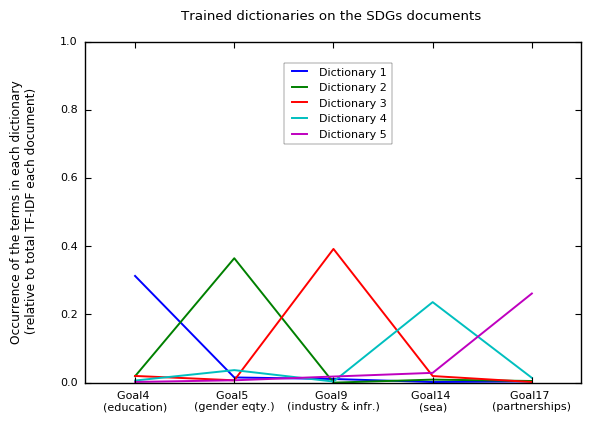

In [24]:
# DEMONSTRATE THAT THESE DICTIONARIES ARE USEFUL
# TO DIFFERENTIATE AMONG THE CHOSEN SDGs

# First we generate the TF-IDF from the document term matrix of the 5 documents
tf = X.copy()
tf[tf > 0] = 1+ np.log(X[X>0]) #term frequency for each word and each document.

S = X.copy()
for i in range(ls):
    S[tf.columns[i]] = tf.iloc[:,i] * idf[tf.columns[i]] #tf*inverse document frequency

titles_short = ['Goal4 \n(education)','Goal5 \n(gender eqty.)','Goal9 \n(industry & infr.)','Goal14 \n(sea)','Goal17 \n(partnerships)']
results = pd.DataFrame(index=titles_short,columns=["Dictionary "+str(1+i) for i in range(5)])
# We apply all the dictionaries and record the results
for i in range(5): 
    dic = S[topic_words[i]]
    results.ix[:,i] = np.array(dic.sum(axis=1)/S.values.sum(axis=1))
    
# plot
import matplotlib
matplotlib.style.use('seaborn-paper')
ax=results.plot(ylim=(0,1),xlim=(-0.5,4.5))
ax.legend(loc=(0.4,0.7))

ax.set_title('Trained dictionaries on the SDGs documents \n')
ax.set_ylabel('Occurrence of the terms in each dictionary\n (relative to total TF-IDF each document)\n')
plt.show() # TO SAVE IT REPLACE WITH plt.savefig('Dictionaries_training.pdf')

# SAVE DICTIONARIES FOR ULTERIOR RETRIEVAL
df_dicts = pd.DataFrame(topic_words)
df_dicts.to_csv("dictionaries.csv", header=None,sep="\t")